In [1]:
from Bi_LSTM import *
from Yelp_Manager import *

In [2]:
yelp = Yelp_Manager(nrows=100000)
yelp.initialize()
yelp.preprocess_dataset()
yelp.process_dataset()

Spacy Embedding text: 100%|████████████████████████████████████████████| 100000/100000 [00:42<00:00, 2372.36it/s]


In [3]:
manager = Bi_LSTM_Manager(epoch=3)

Loss: 0.5650: 100%|███████████████████████████████████████████████████████| 80000/80000 [03:32<00:00, 376.03it/s]


Epoch: 1.000000  Complete
End time:212


Loss: 0.5246: 100%|███████████████████████████████████████████████████████| 80000/80000 [03:31<00:00, 378.11it/s]


Epoch: 2.000000  Complete
End time:211


Loss: 0.5170: 100%|███████████████████████████████████████████████████████| 80000/80000 [03:19<00:00, 400.19it/s]


Epoch: 3.000000  Complete
End time:199


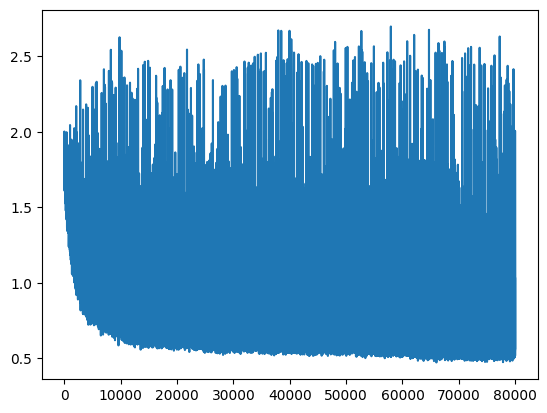

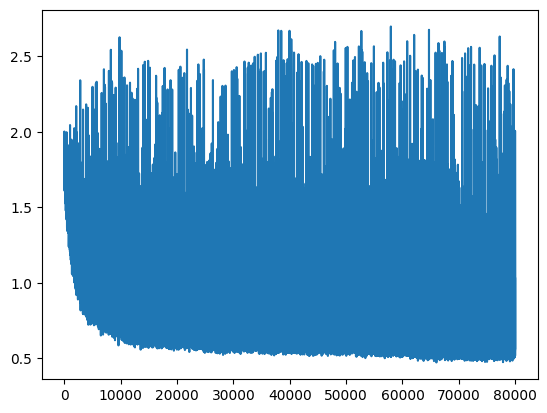

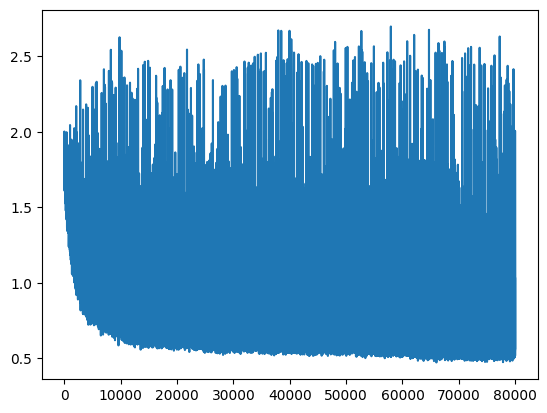

In [4]:
manager.train_model(yelp.X_train, yelp.y_train)

In [5]:
y_valid_pred = manager.predict(yelp.X_valid)

BI_LSTM Prediction: 100%|████████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1403.61it/s]

End time:7


In [6]:
manager.classification_report(yelp.y_valid, pd.DataFrame(y_valid_pred[0].numpy()))

AttributeError: 'list' object has no attribute 'numpy'

In [ ]:
print(classification_report(yelp.y_valid['stars'], y_valid_pred[0]))

In [ ]:
y_test_pred = manager.predict(yelp.X_test)

In [ ]:
manager.classification_report(yelp.y_test, y_test_pred)

In [ ]:
y_valid_pred[0][0].detach().numpy()